<a href="https://colab.research.google.com/github/amitkr6342/AlmaBetter--NYC-Taxi-Trip-Time-Prediction--Regression-Project/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:** NYC Taxi Trip Time Prediction

## **Problem Description:**

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## **Data Description:** 

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

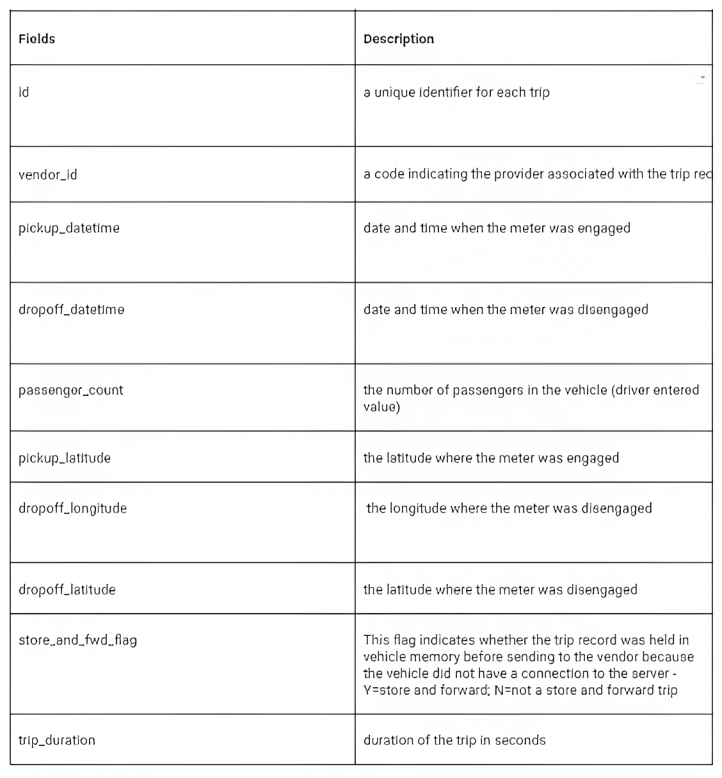

In [2]:
# code to mount the google drive in colab 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Exploring our Dataset:**

In [80]:
# Importing Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# code to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Creating path variable of dataset to store dataset location in google drive
path='/content/drive/MyDrive/Data Science  Projects /AlmaBetter-Machine-Learning-Regression-Projects/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv'

In [83]:
# Reading the Dataset
df = pd.read_csv(path)

In [84]:
# Checking the Shape of the Dataset
df.shape

(1458644, 11)

In [85]:
# Checking first 5 row of dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [86]:
# Checking last 5 row of dataset
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [87]:
# getting informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [88]:
# code to check int64 dtype columns in dataset
df.dtypes[df.dtypes=='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [89]:
# code to check object dtype columns in dataset
df.dtypes[df.dtypes=='object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [90]:
# code to check float dtype columns in dataset
df.dtypes[df.dtypes=='float']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

**Observations:**

* We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type **‘object’**.


* vendor_id, passenger_count, and trip_duration are of type **int**.


* pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type **float**.



In [91]:
# code to check duplicate values in dataset
df.duplicated().sum()

0

In [92]:
# Checking the Basic Stats using Describe() Function and use of lambda to see values without power
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


**Observations:**

* Passenger count has a minimum of 0 which means either it is an error entered or the drivers entered 0 to complete a target number of rides.

* The minimum trip duration is also quite low.

* Trip Duration have high Standard Deviation.

* max trip duration is 3526282

In [93]:
# Code to check all unique values in columns
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [94]:
# checking unique values in vendor_id column
df.vendor_id.unique()

array([2, 1])

In [95]:
# checking unique values in passenger_count column
df.passenger_count.unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [96]:
# checking unique values in store_and_fwd_flag column
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

**Observation:**

* We see that id has 1458644 unique values which are equal to the number of rows in our dataset which means No Missing Value.

* There are 2 unique vendor ids [1,2]

* There are 10 unique passenger counts.

* There are 2 unique values for store_and_fwd_flag, which are Y and N.

### **Feature Creation**

In [97]:
# pickup_datetime and dropoff_datetime were both of type object.
# We can convert it to datetime.

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])


In [98]:
# we will extract and create new features from this datetime features.

# Extracting day of the week, Monday=0 and Sunday=6
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

# Extracting day of the weekday
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

# Extracting hour of the day in the 24-hour format
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

# Extracting minutes of the hour
df['pickup_min']=df['pickup_datetime'].dt.minute
df['dropoff_min']=df['dropoff_datetime'].dt.minute


# Extracting month number with January=1 and December=12
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

* now create a function which determines what time of the day the ride was taken.
I have created 4 time zones 
 
 * ‘Morning’ (from 6:00 am to 11:59 pm) 
 * ‘Afternoon’ (from 12 noon to 3:59 pm)
 * ‘Evening’ (from 4:00 pm to 9:59 pm)
 * ‘Late Night’ (from 10:00 pm to 5:59 am)

In [99]:
# function to determine time of the day the ride was taken 

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [100]:
# now applying above function and creating new columns in the dataset.

df['pickup_time_of_day']=df['pickup_hour'].apply(time_of_day)
df['dropoff_time_of_day']=df['dropoff_hour'].apply(time_of_day)

In [101]:
# code to convert drip duration from second to hour and creating a new column trip_duration_hour
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)

* we have coordinates in the form of longitude and latitude for pickup and dropoff. 

* But, we can’t really gather any insights or draw conclusions from that.

* So, the feature that we can extract from this is **distance**. 

In [102]:
# Importing the library which calculate distance from geographical coordinates.

from geopy.distance import great_circle

In [103]:
# Defining a function to take coordinates as inputs and return us distance.

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
 
  return great_circle(start_coordinates,stop_coordinates).km

In [104]:
# applying the function to dataset and creating the feature 'distance'

df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [105]:
# checking what changes have happened in dataset by adding more columns to it
# code to check column from column number 10 to last positions

df.iloc[:,10:].head()

,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_min,dropoff_min,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour,distance
0,455,Monday,Monday,0,0,17,17,24,32,3,3,Evening,Evening,0.126389,1.498523
1,663,Sunday,Sunday,6,6,0,0,43,54,6,6,Late night,Late night,0.184167,1.805510
2,2124,Tuesday,Tuesday,1,1,11,12,35,10,1,1,Morning,Afternoon,0.590000,6.385108
3,429,Wednesday,Wednesday,2,2,19,19,32,39,4,4,Evening,Evening,0.119167,1.485501
4,435,Saturday,Saturday,5,5,13,13,30,38,3,3,Afternoon,Afternoon,0.120833,1.188590


## **Univariate Analysis**

* The univariate analysis involves studying patterns of all variables individually.

* Analyzing the target variable **trip duration**

### **1. trip_duration**

<Axes: xlabel='trip_duration', ylabel='Count'>

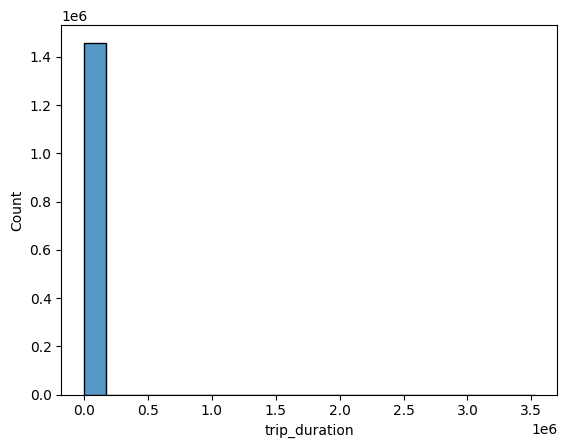

In [106]:
# code to plot histogram of trip duration with count

sns.histplot(df['trip_duration'],kde=False,bins=20)

**observation:**

* This histogram plot Shows That it has Outliers as it is right Skewed. 

<Axes: >

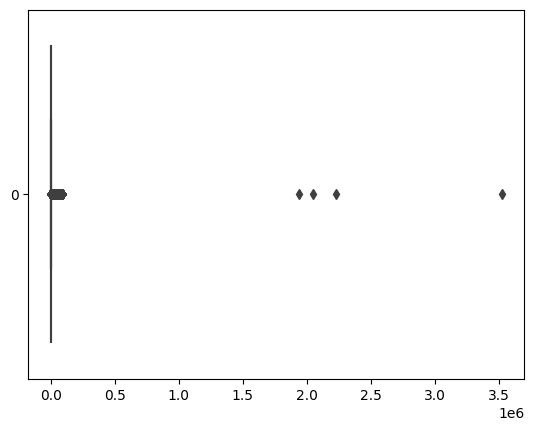

In [107]:
# Box Plot to see if there are any Outliers
sns.boxplot(df['trip_duration'], orient='horizontal')

**observation:**

* We can See there are four Outliers in a dataset.

In [108]:
# code to see outliers values, distances are very less but trip_duration_hour are very large 

df[df['trip_duration_hour'] > 100][['distance', 'trip_duration_hour', 'store_and_fwd_flag']]

,distance,trip_duration_hour,store_and_fwd_flag
355003,20.148692,538.815556,N
680594,5.982495,569.327222,N
924150,1.635130,618.781111,N
978383,19.900690,979.522778,N


In [109]:
# code to drop outliers

df.drop(df[df['trip_duration_hour'] > 500].index, inplace = True)



In [116]:
# checking that outliers are removed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458640 entries, 0 to 1458643
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   vendor_id            1458640 non-null  int64         
 1   pickup_datetime      1458640 non-null  datetime64[ns]
 2   dropoff_datetime     1458640 non-null  datetime64[ns]
 3   passenger_count      1458640 non-null  int64         
 4   pickup_longitude     1458640 non-null  float64       
 5   pickup_latitude      1458640 non-null  float64       
 6   dropoff_longitude    1458640 non-null  float64       
 7   dropoff_latitude     1458640 non-null  float64       
 8   store_and_fwd_flag   1458640 non-null  object        
 9   trip_duration        1458640 non-null  int64         
 10  pickup_day           1458640 non-null  object        
 11  dropoff_day          1458640 non-null  object        
 12  pickup_day_no        1458640 non-null  int64         
 1

In [115]:
# new column id is created now remove this column also
df.drop(['id'], axis=1, inplace=True)

### **2. vendor_id**

<Axes: xlabel='vendor_id', ylabel='count'>

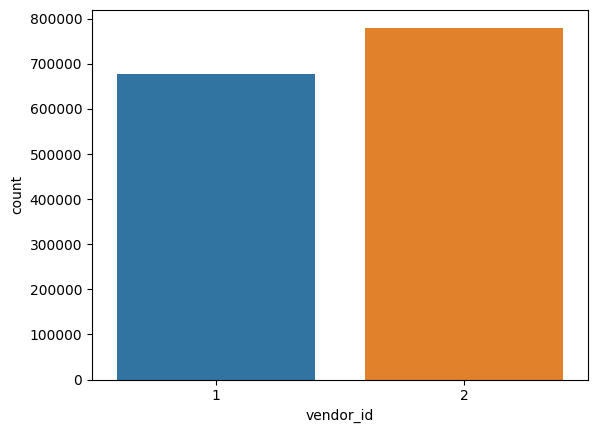

In [117]:
# code for countplot of vendor_id

sns.countplot(x='vendor_id',data=df)

**Observation:** 

* We see that there is not much difference between the trips taken by both vendors.